<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/estudos_de_python_em_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @# markdown codigo é o ticker na B3. Data é ano/mes/dia.

codigo  = 'caml3'       #@param {type:"string"}
inicio  = '2020-01-08'  #@param {type:"date"}
termino = '2022-08-31'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
periodo = '3y' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']

codigo = codigo.upper()

In [2]:
#@markdown Importação do pacotes do python

import warnings
warnings.filterwarnings('ignore')

import datetime
from datetime import datetime
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm


!pip install -q googletrans==4.0.0rc1
from googletrans import Translator
translator = Translator()
from google.colab import data_table


try:
  import yfinance as yf
except:
  !pip install -q yfinance --upgrade
  import yfinance as yf
try:
  import quandl
except:
  !pip install -q quandl
  import quandl
finally:
  quandl.ApiConfig.api_key = 'XjVtHyrCSxB4xG9iyLUx'
try:
  import investpy as inv
except:
  !pip install -q investpy
  import investpy as inv

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

#!pip install -q plotly --upgrade
## plotly
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import iplot, init_notebook_mode

## sns
import seaborn as sns

## cufflinks
import cufflinks as cf
cf.go_offline()

from IPython.display import clear_output 
clear_output()

IBrA = [
    'RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 
    'BBDC4', 'BRAP4','BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 
    'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 
    'ENBR3', 'ENGI11','ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 
    'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3','ITSA4','ITUB4', 'JBSS3', 'JHSF3', 'KLBN11', 'RENT3', 
    'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 
    'PRIO3', 'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RDOR3','RAIL3', 'SBSP3', 'SANB11', 'CSNA3', 'SLCE3', 
    'SULA11', 'SUZB3','TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3','VIIA3', 'VBBR3', 
    'WEGE3', 'YDUQ3', 'NGRD3', 'POSI3' , 'SQIA3' , 'VLID3' 
    ] 

In [3]:
## RENDERIZAÇÂO DE GRAFICOS

#import plotly.io as pio
#pio.renderers
plotly.io.renderers.default = 'colab'

## uso o svg pra enviar para o github, perde o modo interativo
#plotly.io.renderers.default = 'svg'


In [4]:
#@markdown A empresa e Indicadores fundamentalistas (de fundamentus.com.br)

try:
  desc = inv.get_stock_company_profile(stock = codigo , country = "Brazil")
except:
  print(codigo)
else:
  result = translator.translate(desc['desc'], dest='pt')
  #print(result.text)
  import textwrap
  print("\n".join(textwrap.wrap(result.text,118)))

import requests
url = 'https://www.fundamentus.com.br/resultado.php'

#pra fingir que é um browser
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#junta com a requests
r = requests.get(url, headers=header)
# read_html do pandas põe a tabela num dataframe
funds = pd.read_html(r.text, decimal=',', thousands='.')
dfunds = pd.DataFrame(funds[0])

(dfunds.loc[dfunds['Papel']==codigo]).set_index('Papel')

A Camil Alimentos SA é uma empresa brasileira envolvida principalmente no setor de processamento de alimentos.A
empresa se concentra na fabricação e comercialização de arroz, bolachas de arroz, feijão, ervilhas, grão de bico e
sementes de lentilha, refeições à base de soja, pipoca, açúcar e frutos do mar, entre outros.Os produtos da empresa
são distribuídos por vários nomes de marcas, incluindo Camil, Pescador, Coqueiro, Uniao, Barra, Dolce, Namorado,
Butui, Bonzao, Neve e DuCula no Brasil;Saman no Uruguai;Tucapel no Chile, bem como Costeno e Paisana no Peru.A empresa
opera unidades de processamento de grãos, plantas de processamento de peixes e fábricas de açúcar.A Companhia controla
várias subsidiárias, como a Camil Internacional Argentina SA, a Carreteiro Industria E Comercio de Alimentos Ltda e
Ciclo Logistica Ltda.


,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
CAML3,9.09,6.81,1.09,0.329,"4,06%",0.382,1.39,6.74,-4.59,13.05,7.67,"4,87%","4,83%",1.95,"7,20%","15,97%",9649050.0,3.008160e+09,1.28,"22,98%"


Download dos preços

In [5]:
#@ markdown Download dos dados do ativo(s) e do índice

ativo = pd.DataFrame()
ibov = pd.DataFrame()
if usar_periodo : 
  ativo = yf.download(codigo+'.SA', period = periodo , actions=True , progress = False)
  ibov = yf.download('^BVSP', period = periodo , actions=True , progress = False)   
else : 
  ativo = yf.download(codigo+'.SA' , start=inicio , end=termino , actions=True ,  progress = False)
  ibov = yf.download('^BVSP', start=inicio , end=termino , actions=True, progress = False)  

Dividendos no período

In [6]:
print(ativo['Dividends'][ativo['Dividends']!=0].count() , 'proventos pagos no período, total', round(ativo['Dividends'].sum(),2))
print(ativo['Dividends'][ativo['Dividends']!=0])


14 proventos pagos no período, total 1.2
Date
2020-03-03 00:00:00-03:00    0.040540
2020-06-15 00:00:00-03:00    0.040540
2020-09-02 00:00:00-03:00    0.040540
2020-12-09 00:00:00-03:00    0.407783
2020-12-30 00:00:00-03:00    0.054430
2021-03-23 00:00:00-03:00    0.054642
2021-06-02 00:00:00-03:00    0.054789
2021-09-02 00:00:00-03:00    0.068755
2021-12-02 00:00:00-03:00    0.069058
2022-03-04 00:00:00-03:00    0.069441
2022-05-25 00:00:00-03:00    0.083616
2022-06-02 00:00:00-03:00    0.069719
2022-09-02 00:00:00-03:00    0.070724
2022-12-02 00:00:00-03:00    0.071426
Name: Dividends, dtype: float64


# preço


In [7]:
qual_preco = 'Adj Close' #@param ['Open','High','Close','Low','Adj Close']


In [8]:
preco = pd.DataFrame()
preco['Preço'] = ativo[qual_preco]
preco['ibov'] = ibov[qual_preco]
preco['mm21'] = preco['Preço'].rolling(21).mean()
Mov_SD = preco['Preço'].rolling(21).std(ddof=0)
preco['mm21+2dp'] = preco['mm21'] + 2*Mov_SD
preco['mm21-2dp'] = preco['mm21'] - 2*Mov_SD
preco.iplot(
    keys = ['Preço','mm21','mm21+2dp','mm21-2dp'], yTitle='Preço' , 
            colors=['blue','red','gray','gray'])

In [9]:
qf=cf.QuantFig(ativo[-100:]
               ,title=codigo,legend='top',name='GS',up_color='green', down_color='red' )
qf.add_bollinger_bands(periods=20, boll_std=2, colors=['cyan','grey'], fill=True)
qf.add_ema(periods=5)
qf.add_rsi(periods=2,color='red',rsi_upper=95,rsi_lower=5,showbands=True)
#qf.add_macd(fast_period=9,slow_period=21,signal_period=3)
#qf.add_resistance(date='2022-11-11', on='close', color='orange')

fig = qf.figure()
fig.update_xaxes(
    rangebreaks=[dict(bounds=["sat", "mon"])])
fig.show()

###simulação 

In [10]:
n_dias =         2#@param {type:"integer"} 
n_grafico = n_dias + 21
n_cenarios =    1000#@param {type:"integer"}

In [11]:
s_media     = (np.log(preco['Preço']/preco['Preço'].shift(1))).mean()
s_variancia = (np.log(preco['Preço']/preco['Preço'].shift(1))).var()
s_desvio_padrao = s_variancia**.5
## simula movimento browniano geométrico (MBG)
Z = stats.norm.ppf(np.random.rand(n_dias,n_cenarios))
retornos_diarios = np.exp((s_media - (0.5 * s_variancia)) + s_desvio_padrao * Z)
previsoes = np.zeros_like(a = np.arange(n_grafico*n_cenarios),dtype=float,shape=(n_grafico,n_cenarios))

for dia in range(n_grafico) :
  if dia < (n_grafico - n_dias) :
    previsoes[dia] = preco['Preço'].tail(n_grafico - n_dias).values[dia]
  else : 
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia - (n_grafico-n_dias)]

cenarios = pd.DataFrame()
for i in range(len(previsoes.T)):
  cenarios['cenario'+str(i)] = previsoes.T[i]

In [12]:
fig = cenarios.iplot(asFigure=True)

titulo = str(n_cenarios)+' cenarios para '+str(n_dias)+' dias futuros '+codigo+ ' usando simulação de um MBG'
layout = go.Layout(title=titulo,
                   yaxis={'title' : 'preço' , 'side' : 'right'},
                   xaxis={'title' : 'dias' , 'dtick' : 1 })

fig.update_layout(layout,showlegend=False)
fig.show()

intervalo de confiança 99% para o dia 15

In [13]:
stats.t.interval(alpha=0.99, df=n_cenarios-1, loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias])) 
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[n_grafico - n_dias]), scale=stats.sem(previsoes[n_grafico - n_dias])) 

(9.075061819726466, 9.11167690517612)

intervalo de confiança 99% para o dia 19

In [14]:
stats.t.interval(alpha=0.99, df=n_cenarios-1, loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1])) 
#stats.norm.interval(alpha=0.99, loc=np.mean(previsoes[-1]), scale=stats.sem(previsoes[-1])) 

(9.06314639068657, 9.116343743315502)

In [15]:
title='Distribuição dos preços na simulação'

from plotly.subplots import make_subplots

trace1 = go.Histogram(x=previsoes[n_grafico - n_dias] , nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='primeiro dia simulado')
trace3 = go.Histogram(x=previsoes[-1], nbinsx= int(2*(len(previsoes[n_grafico - n_dias]))**(1/3)), histnorm='probability density',name='ultimo dia simulado')
trace2 = go.Box(y=previsoes[n_grafico - n_dias],name='primeiro dia simulado')
trace4 = go.Box(y=previsoes[-1],name='ultimo dia simulado')

fig = make_subplots(rows=1, cols=4)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,1,4)

fig['layout'].update(height=350, width=800, title=title)

fig.show()

#alternativa 
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4))
#plt.subplots_adjust(wspace=0.5)
#fig.suptitle('Distribuição dos preços na simulação, os dois primeiros no começo da previsão, os dois últimos no fim')
#ax1.hist(previsoes[n_grafico - n_dias], bins='rice', density=True,  edgecolor="white");
#ax3.hist(previsoes[-1], bins='rice', density=True,edgecolor="white" );
#ax2.boxplot(previsoes[n_grafico - n_dias],widths=.5);
#ax4.boxplot(previsoes[-1],widths=.5);

### cointegração

In [16]:
from statsmodels.tsa.stattools import coint, adfuller

def check_estacionaridade(X, cutoff=0.01):
    # H_0 é nã0-estacionário, i.e., raiz unitaria por adfuller

    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' A serie é, provavelmente, estacionaria.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' A serie  é, provavelmente, não-estacionaria.')
        return False

In [17]:
check_estacionaridade(preco['Preço'])

p-value = 0.059486199903182026 A serie  é, provavelmente, não-estacionaria.


False

In [18]:
check_estacionaridade(preco['Preço'].pct_change().dropna())


p-value = 0.0 A serie é, provavelmente, estacionaria.


True

In [19]:
Delta_preco = preco['Preço'].diff()[1:]
Delta_preco.name =  'Retorno aditivo de ' + preco['Preço'].name
check_estacionaridade(Delta_preco)

p-value = 0.0 A serie é, provavelmente, estacionaria.


True

In [20]:
print(codigo+' cointegra com ')

if usar_periodo : 
  IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), period = periodo , progress = False)[qual_preco]
else : 
  IBrA_preco = yf.download((pd.Series(IBrA)+'.SA').to_list(), start=inicio , end=termino , progress = False)[qual_preco]

X = pd.Series(preco['Preço']).values
for T in IBrA : 
    if T == codigo : continue
    Y = pd.Series(IBrA_preco[T+'.SA'].dropna()).values
    """
    Test for no-cointegration of a univariate equation.

    The null hypothesis is no cointegration. Variables in y0 and y1 are
    assumed to be integrated of order 1, I(1).
    """
    if Y.shape == X.shape :  
      t,p,c = coint(X,Y)
      for pvalue in [0.01,0.05] : 
        if p < pvalue : 
          print(T+' no nivel '+str((1-pvalue)*100)+"%", end=" - ")
          if pvalue == 0.01 : vc=c[0]
          elif pvalue == 0.05 : vc=c[1]
          else : vc=c[2]
          print('score='+str(t)+' para o valor crítico '+str(vc))
          break


CAML3 cointegra com 
PCAR3 no nivel 95.0% - score=-3.7757690209312726 para o valor crítico -3.3443437696500156


##Drawdown máximo no período


In [21]:
def get_max_drawdown(price):
  data = pd.DataFrame(price)
  column = price.name
  data['max'] = data[column].cummax()
  data['delta'] = data['max'] - data[column]
  data['dd'] = 100 * (data['delta'] / data['max'])
  maxdrawdown = data['dd'].max()
  bottom_day = data['dd'].idxmax()
  bottom_index = data[['dd']].index.get_loc(bottom_day)
  max_value = data.iloc[bottom_index]['max']
  top_day = (data['max'] == max_value).idxmax()
  top_index = data[['max']].index.get_loc(top_day)
  return maxdrawdown, bottom_day, bottom_index, top_day, top_index

In [22]:
dd, bday, bindex, tday, tindex = get_max_drawdown(preco['Preço'])
print('max drawdown ', round(dd,2),'% de ', tday.strftime('%d/%m/%Y') , ' até ' , bday.strftime('%d/%m/%Y') )

max drawdown  43.84 % de  15/10/2020  até  13/01/2023


In [23]:
trace1 = go.Scatter(x = preco.index, y = preco['Preço'], mode = 'lines' , name = 'preço' )
trace2 = go.Scatter(x = [preco.index[bindex],preco.index[tindex]],
                    y = [preco['Preço'].iloc[bindex] , preco['Preço'].iloc[tindex]],
                   mode = 'markers', name = 'topo e fundo do DD',
                   marker =  {'color' : 'orange',
                              'line' : {'width': 5,
                                        'color': '#c0392b'}} )
layout =  dict( title = codigo,
 #   height = 772,
  #  width = 950,
  #  font = dict(
  #    size = 10
  #  ),    
)

data_trace = [trace1,trace2]

fig=go.Figure(data=data_trace , layout=layout)
fig.show()

In [24]:
#@title #### Drawdowns por ano 
years = [*range(datetime.strptime(inicio, "%Y-%m-%d").year , datetime.strptime(termino, "%Y-%m-%d").year + 1)]
DDM = pd.DataFrame(columns=[codigo , 'Ibov'],index=years)#, codigo , 'Ibov'])

In [25]:
i=0
yearly_data=pd.DataFrame()
for year in years :
  yearly_data = preco[preco.index.year == year].copy()

  if len(yearly_data.index)>0 :
      yearly_dd1,_,_,_,_ = get_max_drawdown(yearly_data['Preço'])
      yearly_dd2,_,_,_,_ = get_max_drawdown(yearly_data['ibov'])
      DDM.loc[year] = [round(yearly_dd1,2), round(yearly_dd2,2)]
  i=i+1

Drawdowns máximos por ano:


,CAML3,Ibov
2020,29.28,46.82
2021,24.97,22.94
2022,30.04,20.93


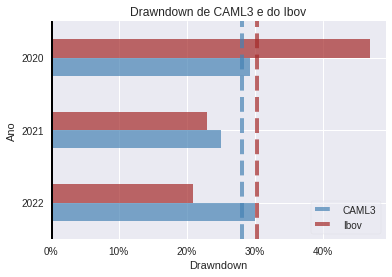

In [26]:
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    """
    Adds percentage sign to plot ticks.
    """

    return '%.0f%%' % x

ax = plt.gca()

x_axis_formatter = FuncFormatter(percentage)
ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))
ax.tick_params(axis='x', which='major')

ax.axvline(DDM[codigo].values.mean(),color='steelblue',linestyle='--',lw=4,alpha=0.7);
ax.axvline(DDM['Ibov'].values.mean(), color='brown',  linestyle='--',lw=4,alpha=0.7);
(DDM.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= ['steelblue','brown']);
ax.axvline(0.0, color='black', linestyle='-', lw=3);

ax.set_ylabel('Ano');
ax.set_xlabel('Drawndown');
ax.set_title("Drawndown de "+codigo+" e do Ibov");
ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

print('Drawdowns máximos por ano:')

DDM

# Retornos


In [27]:
preco['retorno'] = preco['Preço'].pct_change()
preco['log_retorno'] = np.log(preco['Preço']) - np.log(preco['Preço'].shift(1))
ibov['Preço'] = ibov[qual_preco]
ibov['retorno'] = ibov['Preço'].pct_change()
ibov['log_retorno'] = np.log(ibov['Preço']) - np.log(ibov['Preço'].shift(1))

In [28]:
retornos = pd.merge(ibov['retorno'], preco['retorno'],
                    left_index=True, right_index=True, how='inner')
retornos = retornos.rename(columns={ibov['retorno'].name+'_x':'r_ibov' , preco['retorno'].name+'_y':'r_'+codigo})
retornos['lr_ibov'] = ibov['log_retorno']
retornos['lr_'+codigo] = preco['log_retorno'] 
retornos.dropna(inplace=True)

print(retornos.shape)
retornos.head(2)

(745, 4)


,r_ibov,r_CAML3,lr_ibov,lr_CAML3
Date,,,,
2020-01-21 00:00:00-03:00,-0.015446,0.010638,-0.015567,0.010582
2020-01-22 00:00:00-03:00,0.011664,0.009474,0.011597,0.009429


In [29]:
##semanal
weekly_returns = pd.DataFrame()
weekly_returns[codigo] = preco['Preço'].resample('W').ffill()
weekly_returns['retorno'] =  weekly_returns[codigo].pct_change()
weekly_returns.dropna(inplace=True)

##mensal
monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill()
monthly_returns['retorno'] = monthly_returns[codigo].pct_change()
monthly_returns.dropna(inplace=True)

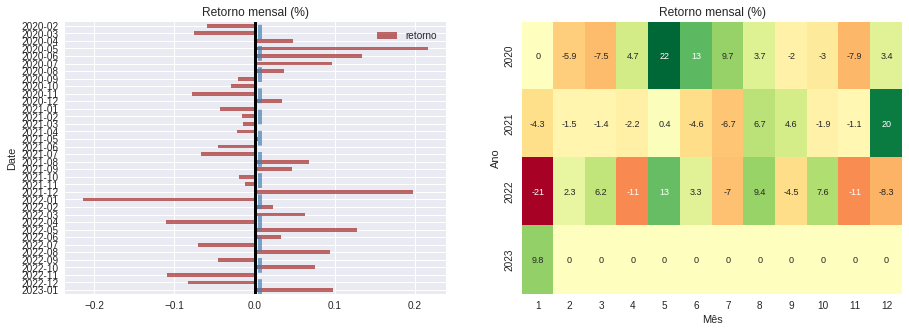

In [30]:
fig = plt.figure(1)
plt.subplot(1,2,1)
ax = plt.gca()

mr = pd.DataFrame(data=monthly_returns['retorno'])
mr.index = mr.index.to_period(freq='M')

ax.axvline(mr.values.mean(), color='steelblue',  linestyle='--',lw=4,alpha=0.7);
(mr.sort_index(ascending=False)).plot(ax=ax, kind='barh', alpha=0.70 , color= 'brown');
ax.axvline(0.0, color='black', linestyle='-', lw=3);
ax.set_title("Retorno mensal (%)")

#ax.set_ylabel('Ano');
#ax.set_xlabel('Drawndown');
#ax.set_title("Drawndown de "+codigo+" e do Ibov");
#ax.legend([codigo,'Ibov'], frameon=True, framealpha=0.5);

plt.subplot(1,2,2)
ax = plt.gca()

returns_table = monthly_returns.pivot_table(values='retorno', 
                               index=monthly_returns.index.year, 
                               columns=monthly_returns.index.month, 
                               aggfunc='mean')

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax)
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(15,5)
plt.show()

### normalidade na distribuição dos retornos

In [31]:
r_media = retornos['r_'+codigo].mean() 
r_variancia = retornos['r_'+codigo].var()
r_desviopadrao = retornos['r_'+codigo].std()

jb_test = stats.jarque_bera(retornos['r_'+codigo].values)
print(f'teste Jarque-Bera: {jb_test[0]:.2f} com p-valor: {jb_test[1]:.2f}')
r_range = np.linspace(min(retornos['r_'+codigo]), max(retornos['r_'+codigo]), num=1000)
norm_pdf = stats.norm.pdf(r_range, loc=r_media , scale=r_desviopadrao)

teste Jarque-Bera: 2111.68 com p-valor: 0.00


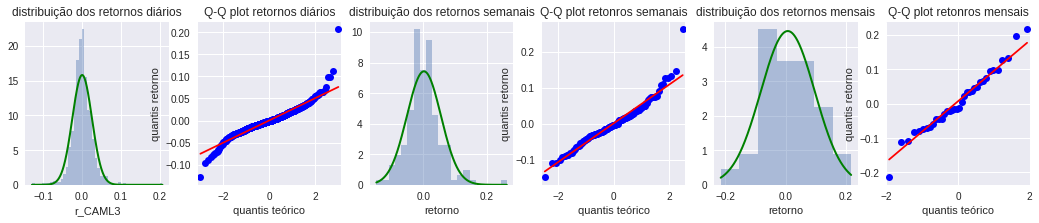

In [32]:
r_fig, ax = plt.subplots(1, 6 , figsize=(18,3))

r_range = np.linspace(min( retornos['r_'+codigo]), max( retornos['r_'+codigo]), num=1000)
# histograma diário
sns.distplot( retornos['r_'+codigo], kde=False, norm_hist=True, ax=ax[0])
ax[0].set_title('distribuição dos retornos diários')#, fontsize=12)
ax[0].plot(r_range, stats.norm.pdf(r_range, loc=r_media, scale=r_desviopadrao) ,#
           'g', lw=2,label=f'N({r_media:.2f}, {r_variancia:.4f})')
# Q-Q plot diário
qq1 = sm.qqplot( retornos['r_'+codigo].values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot retornos diários')#, fontsize = 12)
ax[1].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

##semanal
r_range = np.linspace(min(weekly_returns['retorno']), max(weekly_returns['retorno']), num=1000)
w_m = weekly_returns['retorno'].mean() 
w_s = weekly_returns['retorno'].std()

# histograma semanal
sns.distplot(weekly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[2])
ax[2].set_title('distribuição dos retornos semanais')#, fontsize=12)
ax[2].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot semanal
qq2 = sm.qqplot(weekly_returns['retorno'].values, line='s', ax=ax[3])
ax[3].set_title('Q-Q plot retonros semanais')#, fontsize = 12)
ax[3].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')


##mensal
r_range = np.linspace(min(monthly_returns['retorno']), max(monthly_returns['retorno']), num=1000)
w_m = monthly_returns['retorno'].mean() 
w_s = monthly_returns['retorno'].std()

# histograma mensal
sns.distplot(monthly_returns['retorno'] , kde=False, norm_hist=True, ax=ax[4])
ax[4].set_title('distribuição dos retornos mensais')#, fontsize=12)
ax[4].plot(r_range, stats.norm.pdf(r_range, loc= w_m, scale= w_s),
           'g', lw=2,label=f'N({w_m:.2f}, {w_s**2:.4f})')
# Q-Q plot mensal
qq2 = sm.qqplot(monthly_returns['retorno'].values, line='s', ax=ax[5])
ax[5].set_title('Q-Q plot retonros mensais')#, fontsize = 12)
ax[5].set(xlabel = 'quantis teórico', ylabel = 'quantis retorno')

fig.tight_layout() 
fig.show()

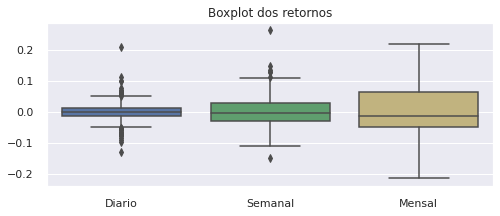

In [33]:
sns.set(rc={'figure.figsize':(8,3)})
sns.axes_style(style='darkgrid' ) 
ax = plt.gca()
ax.set_title('Boxplot dos retornos')  
sns.boxplot(data=[retornos['r_'+codigo], weekly_returns['retorno'], monthly_returns['retorno']], 
                palette=["#4c72B0", "#55A868", "#CCB974"], ax=ax)
ax.set_xticklabels(['Diario', 'Semanal', 'Mensal']);

comparação com ibov

In [34]:
print('-- Estatísticas do retorno diário')
tmp = [['Intervalo de datas' , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date)) , str(min(retornos.index.date))+' ~ '+str(max(retornos.index.date))],
       ['no. de observações' , retornos['r_'+codigo].shape[0] , retornos['r_ibov'].shape[0]],
       ['min', str(round( retornos['r_'+codigo].min()*100,3))+'%', str(round( retornos['r_ibov'].min()*100,3))+'%'],
       ['max', str(round( retornos['r_'+codigo].max()*100,3))+'%', str(round( retornos['r_ibov'].max()*100,3))+'%'],
       ['média', str(round( retornos['r_'+codigo].mean()*100,3))+'%', str(round( retornos['r_ibov'].mean()*100,3))+'%'],
       ['mediana', str(round( retornos['r_'+codigo].median()*100,3))+'%', str(round( retornos['r_ibov'].median()*100,3))+'%'],
       ['desvio padrão', str(round( retornos['r_'+codigo].std()*100,3))+'%', str(round( retornos['r_ibov'].std()*100,3))+'%'],
       ['assimetria', round( retornos['r_'+codigo].skew(),3), round( retornos['r_ibov'].skew(),3)],
       ['curtose', round( retornos['r_'+codigo].kurtosis(),3), round( retornos['r_ibov'].kurtosis(),3)],  
       ['retorno anualizado',str(round( retornos['r_'+codigo].mean()*252*100,2))+'%' , str(round( retornos['r_ibov'].mean()*252*100,2))+'%'],   
       ['dp anualizado',str(round( retornos['r_'+codigo].std()*np.sqrt(252)*100,2))+'%' , str(round( retornos['r_ibov'].std()*np.sqrt(252)*100,2))+'%'],
      ]       
vol = pd.DataFrame(tmp , columns=['tmp' , 'r_'+codigo , 'r_ibov'], index=[i[0] for i in tmp])
vol.drop('tmp',axis=1, inplace=True)
data_table.DataTable(vol , include_index=True ,num_rows_per_page=15)

-- Estatísticas do retorno diário


,r_CAML3,r_ibov
Intervalo de datas,2020-01-21 ~ 2023-01-18,2020-01-21 ~ 2023-01-18
no. de observações,745,745
min,-12.883%,-14.78%
max,20.717%,13.908%
média,0.042%,0.012%
mediana,-0.093%,0.052%
desvio padrão,2.523%,1.956%
assimetria,0.677,-0.985
curtose,8.199,14.819
retorno anualizado,10.69%,3.01%


In [35]:
#@markdown histogramas dos retornos diários

retornos.iplot(kind='histogram',
                  #subplots=True,
                  keys = ['r_'+codigo,'r_ibov'],
                  colors=['orange','purple'],
                  title='Histrograma dos retornos diários',
                  #theme="henanigans"
                  )

In [36]:
title = "Distribuição dos retornos ativo X ibov"

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_'+codigo].values, name='retorno '+codigo)
    ,row=1, col=1)
fig.add_trace(
    go.Violin(meanline_visible=True, box_visible = True, y= retornos['r_ibov'], name='retorno ibov')
    ,row=1, col=2)
fig.update_layout(title_font_size=12 , width=800 , height=400 , showlegend=False,
               title={'text': title,'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},   ) 

fig.show()

In [37]:
stats.t.interval(alpha=0.98, df=len(retornos)-1,
              loc= retornos['r_ibov'].mean(),
              scale=stats.sem(retornos['r_ibov']))

(-0.0015507344271921595, 0.0017900076594050294)

In [38]:
ipca = quandl.get('BCB/13522', start_date = min(retornos.index.date))
ipca.rename(columns={'Value': 'ipca'}, inplace=True)
cdi=quandl.get('BCB/12', start_date = min(retornos.index.date))
cdi.rename(columns={'Value': 'cdi'}, inplace=True)

In [39]:
cdi.index=cdi.index.tz_localize(tz='America/Sao_Paulo')
ipca.index=ipca.index.tz_localize(tz='America/Sao_Paulo')

In [40]:
# @ markdown gráficos dos retornos mensais 

monthly_returns = pd.DataFrame()
monthly_returns[codigo] = preco['Preço'].resample('M').ffill().pct_change()
monthly_returns['Ibov'] = ibov['Preço'].resample('M').ffill().pct_change()
monthly_returns['CDI']  = cdi['cdi'].resample('M').ffill().pct_change()
monthly_returns['IPCA'] = ipca['ipca'].pct_change()

trace2 = (monthly_returns).iplot(title= 'Variação percentual mensal')

In [41]:
cum_returns = (monthly_returns + 1).cumprod() - 1
trace3 = cum_returns.iplot(title= 'Acumulado')

### correlação dos retornos com ativos do índice amplo

In [42]:
IBrA_rtrns = pd.DataFrame()
if codigo in IBrA : IBrA_rtrns = IBrA_preco.pct_change()  
else :
  IBrA_rtrns = (IBrA_preco.pct_change()).join(retornos['r_'+codigo],how='inner')
  IBrA_rtrns.rename(columns={'r_'+codigo : codigo+'.SA'}, inplace=True)
IBrA_rtrns.dropna(inplace=True)
#m=IBrA_rtrns.corr()

In [43]:
data_corr = pd.DataFrame(IBrA_rtrns.corr().loc[codigo+'.SA'])

(no colab) clique na figura


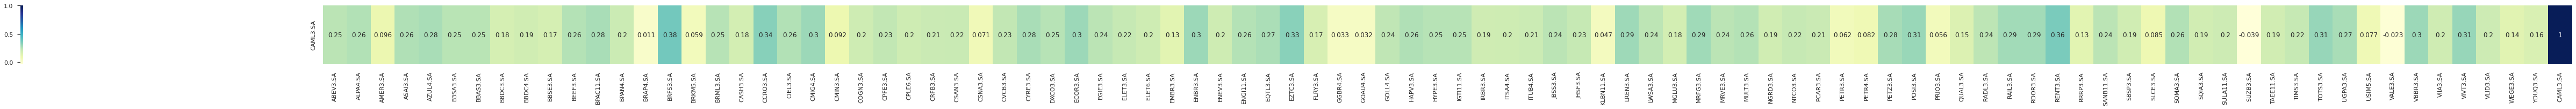

In [44]:
sns.set(rc = {'figure.figsize':(100,2)})
sns.heatmap(data_corr.T, annot = True, cmap = 'YlGnBu' , cbar_kws = dict(use_gridspec = False, location = "left"))
print('(no colab) clique na figura')

### retorno esperado pelo CAPM 



In [45]:
## o join garante a coincidencia da datas
capm_data = ((cdi.join(retornos['r_'+codigo])).join(retornos['r_ibov'])).dropna()
capm_data.head(2)

,cdi,r_CAML3,r_ibov
Date,,,
2020-01-21 00:00:00-03:00,0.017089,0.010638,-0.015446
2020-01-22 00:00:00-03:00,0.017089,0.009474,0.011664


In [46]:
X = capm_data['r_ibov'] - capm_data['cdi']     # excesso retorno ativo
y = capm_data['r_'+codigo] - capm_data['cdi']  # excesso retorno indice 
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
_, beta = result.params

expected_return = capm_data['cdi'].mean() + beta*X.mean()
print("Retorno diário esperado: " + str(expected_return))
monthly_return = expected_return * 21
print("Retorno mensal esperado: " + str(monthly_return))
yearly_return = monthly_return * 12
print("Retorno anual esperado : " + str(yearly_return))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     433.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.93e-76
Time:                        11:47:31   Log-Likelihood:                 1731.5
No. Observations:                 744   AIC:                            -3459.
Df Residuals:                     742   BIC:                            -3450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0078      0.001     -6.419      0.0

### hedge

In [47]:
slope,intercept, r, pvalue, stderr = stats.linregress(x=retornos['r_ibov'], y=retornos['r_'+codigo])

print(f'A correlação entre os retornos é {r:.2f}')

line_x = np.linspace(retornos['lr_ibov'].min(), retornos['lr_ibov'].max(),100)
line_y = slope*line_x + intercept
trace1 = go.Scatter(x = line_x,y = line_y, mode = 'lines' )

trace2 = go.Scatter(x = retornos['lr_ibov'], y=retornos['lr_'+codigo] , mode ='markers')                   
                
layout = dict(title = f'O beta é {slope:.2f}, o alpha é {intercept:.2f} e   R²={r**2:.3f}',
              xaxis_title="Ibov",
              yaxis_title=codigo,
              height = 450,width = 620,
              showlegend=False,
              font = dict(size = 12),    )

data_trace = [trace1,trace2]
ply.iplot(go.Figure(data=data_trace , layout=layout))

A correlação entre os retornos é 0.35


In [48]:
# beta hedge
""" 
Portfolio managers design factor models that tell them how to balance a portfolio to earn alpha. 
Because alpha is how managers get paid, they only want exposure to their factors. 
Beta hedging removes the part of returns driven by the market and leaves only the returns driven by the factors.
"""


retornos[codigo+"+Hedge"] = -1 * slope * retornos['r_ibov']+ retornos['r_'+codigo]
retornos.iplot(   keys = ['r_'+codigo,'r_ibov',codigo+"+Hedge"],
                  colors=['orange','purple', 'red'],
                  title='Retornos diários' )


In [49]:
P = retornos[codigo+"+Hedge"].values
X = retornos['r_ibov'].values
alpha,beta,_,_,_ = stats.linregress(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: 3.719011669091384e-16
Beta: 0.0003704345326990375


#Volatilidade

##Volatilidade Condicional

Garch(1,1): a variância condicional é $\sigma_n^2 = \omega + \alpha r_{n-1}^2 + \beta\sigma_{n-1}^2 $, as letras gregas são parâmetros estimados (por máx. verossimilhamça) do modelo, $r$ é retorno e $\sigma^2$ variância.  Os parâmetros:  $\omega = (1-\alpha-\beta)\cdot(\text{var de longo prazo})$, que é uma "reversão a média": $\sigma_{\infty}^2\to \text{VLP}$ com velocidade $1-\alpha-\beta$; $\alpha$ é o peso dos retornos  mais recentes, desde que $\alpha,\beta,\omega\geq 0$ e $\alpha+\beta<1$; $\beta$ é velocidade do  decaimento para as volatilidades mais recentes. 

Quando $\omega=0,\alpha=1-\lambda, \beta=\lambda$ é o ewma: $ (1-\lambda) r_{n-1}^2 + \lambda \sigma_{n-1}^2$


In [50]:
#@title ####   EWMA
#@markdown fator de decaimento para ewma:
Lambda=0.94 #@param {type:"number"}


In [51]:
ewma = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
ewma['vol'].iloc[0] = np.sqrt((retornos['r_'+codigo][0:4]**2).sum())
for t in range(1,len(retornos['r_'+codigo])):
    ewma.iloc[t] = np.sqrt((1-Lambda)*retornos['r_'+codigo].iloc[t-1]**2 + Lambda*ewma.iloc[t-1]**2)
ewma.tail(3)

,vol
Date,
2023-01-16 00:00:00-03:00,0.027671
2023-01-17 00:00:00-03:00,0.027309
2023-01-18 00:00:00-03:00,0.027148


In [52]:
######### 
tmp=pd.DataFrame()
tmp['ewma1'] = (retornos['r_'+codigo].ewm(alpha = 0.06, min_periods=4, adjust=False).std()).shift(1)
tmp['ewma2'] = ewma['vol']
tmp.iplot(dimensions=(600,300))
##########

In [53]:
#@title ####   GARCH(1,1)

!pip install -q arch
import scipy.optimize as spop

def garch_mle(params):
    mu    = params[0]
    omega = params[1]
    alpha = params[2]
    beta  = params[3]
    #variancia de longo prazo
    long_var =  (omega/(1 - alpha - beta))
    #volatilidade de longo prazo 
    long_run = np.sqrt(long_var*252)
    #volatilidade condicional
    resid = retornos['r_'+codigo] - mu
    realised = abs(resid)
    conditional = np.zeros(len(retornos['r_'+codigo]))
    conditional[0] =  long_run
    # GARCH
    for t in range(1,len(retornos['r_'+codigo])):
        conditional[t] = (omega + alpha*resid[t-1]**2 + beta*conditional[t-1]**2)**(1/2)
    # np.log-verossimilhança
    likelihood = 1/((2*np.pi)**(1/2)*conditional)*np.exp(-realised**2/(2*conditional**2))
    np.log_likelihood = np.sum(np.log(likelihood))
    return -np.log_likelihood
### grach parametros
# maximização  np.log-verossimilhança 
res = spop.minimize(garch_mle , [r_media, r_variancia, 0, 0  ], method='Nelder-Mead')
    
params = res.x
G_mu     = res.x[0]
G_omega  = res.x[1]
G_alpha  = res.x[2]
G_beta   = res.x[3]
np.log_likelihood = -float(res.fun)
#print('np.log-verossim. '+str(round(np.log_likelihood, 4)))
###############################

print('Parâmetros do GARCH encontrados:')
print('mu '+str(round(G_mu, 6)))
print('omega '+str(round(G_omega, 6)))
print('alpha '+str(round(G_alpha, 6)))
print('beta  '+str(round(G_beta, 6)))


Parâmetros do GARCH encontrados:
mu 0.000672
omega 0.000552
alpha 0.162733
beta  -0.002963


In [54]:
long_run = (G_omega/(1 - G_alpha - G_beta))**(1/2)
G_resid = retornos['r_'+codigo] - G_mu

conditional = pd.DataFrame(data = 0, columns=['vol'],index=retornos.index)
conditional['vol'].iloc[0] = long_run
for t in range(1,len(retornos['r_'+codigo])):
    conditional['vol'].iloc[t] = (G_omega + G_alpha*G_resid.iloc[t-1]**2 + G_beta*conditional.iloc[t-1]**2)**(1/2)
conditional.tail(3)

,vol
Date,
2023-01-16 00:00:00-03:00,0.030495
2023-01-17 00:00:00-03:00,0.024811
2023-01-18 00:00:00-03:00,0.025351


In [55]:
print('VOLATILIDADE:')
print('volatilidade diária de longo prazo '+str(round(long_run, 6)*100)+'%')
print('volatilidade de longo prazo anualizada '+str(round(long_run*np.sqrt(252), 6)*100)+'%')
print(' ')

VOLATILIDADE:
volatilidade diária de longo prazo 2.5636%
volatilidade de longo prazo anualizada 40.6953%
 


In [56]:
from arch import arch_model
model = arch_model(retornos['r_'+codigo], mean='constant',vol='GARCH', p=1, q=1,dist='normal')
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                r_CAML3   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1702.41
Distribution:                  Normal   AIC:                          -3396.81
Method:            Maximum Likelihood   BIC:                          -3378.36
                                        No. Observations:                  745
Date:                Thu, Jan 19 2023   Df Residuals:                      744
Time:                        11:47:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.5365e-04  9.912e-04      0.559      0.576 

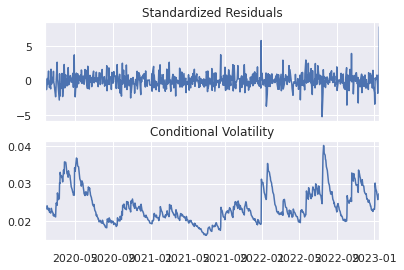

In [57]:
%matplotlib inline
model_fitted.plot();

In [58]:
model_forecast = model_fitted.forecast(horizon=5)

In [59]:
model_forecast.variance[-1:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-01-18 00:00:00-03:00,0.002811,0.002767,0.002724,0.002683,0.002642


In [60]:
######### 
tmp=pd.DataFrame()
tmp['garch1'] = conditional['vol']
tmp['garch2'] = model_fitted.conditional_volatility
tmp.iplot(dimensions=(600,300))
##########

In [61]:
vols = pd.DataFrame(columns=['ewma' , 'dp' , 'garch(1,1)' , 'longo prazo' , 'g-model'] , index = retornos.index)
vols['ewma'] = ewma['vol']
vols['dp'] = r_desviopadrao
vols['garch(1,1)'] = conditional['vol']
vols['longo prazo'] = long_run
vols['g-model']=model_fitted.conditional_volatility

In [62]:
vols.iplot()

In [63]:
vols.round(decimals=3).iloc[::-1].head(3)

,ewma,dp,"garch(1,1)",longo prazo,g-model
Date,,,,,
2023-01-18 00:00:00-03:00,0.027,0.025,0.025,0.026,0.027
2023-01-17 00:00:00-03:00,0.027,0.025,0.025,0.026,0.027
2023-01-16 00:00:00-03:00,0.028,0.025,0.030,0.026,0.027


In [64]:
rolling_predictions = []
test_size = 252

for i in range(test_size):
    train = retornos['r_'+codigo][:-(test_size-i)]
    model = arch_model(train, mean='constant',vol='GARCH', p=1, q=1,dist='normal')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=retornos['r_'+codigo].index[-test_size:])
rolling_predictions.iplot(dimensions=(600,250))

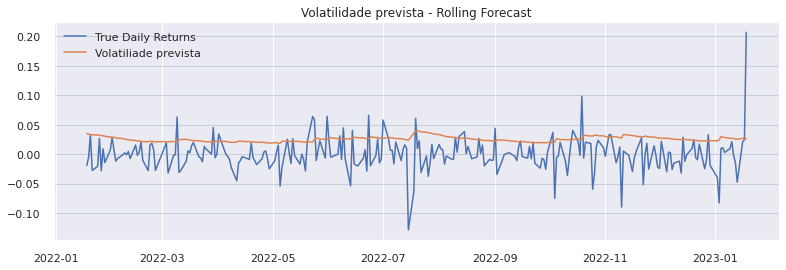

In [65]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
#ax.spines[['top','right']].set_visible(False)
plt.plot(retornos['r_'+codigo][-test_size:])
plt.plot(rolling_predictions)
plt.title('Volatilidade prevista - Rolling Forecast')
plt.legend(['True Daily Returns', 'Volatiliade prevista'])


## Preço das opções por BS
Preço da Call $ = SN(d_1) - K e^{-rt}N(d_2)$ e 

Preço da Put $ = Ke^{-rt}N(-d_2)-SN(-d_1)$

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})t}{\sigma \cdot \sqrt{t}}$
e $d_2 = d_1 - \sigma \cdot \sqrt{t}$

S = Preço atual da ação; K = Preço de Strike; r = Taxa livre de risco (com capitalização composta); 
σ =Variância (anual) do retorno contínuo da ação; t = Prazo (em anos) até a data de vencimento;
N(d) = Probabilidade de que uma variável aleatória padronizada e com distribuição normal, seja menor ou igual a d


In [66]:
def call_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*stats.norm.cdf(d1)-E*np.exp(-rf*T)*stats.norm.cdf(d2)


def put_option_price(S, E, T, rf, sigma):
    # d1 and d2 parameters
    d1 = (np.log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S*stats.norm.cdf(-d1)+E*np.exp(-rf*T)*stats.norm.cdf(-d2)


In [67]:
#data
vencimento = "2023-02-17"    #@param {type:"date"}
venc= datetime.strptime(vencimento, '%Y-%m-%d')

hoje= preco.index[-1]
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
# taxa livre risco
selic = quandl.get('BCB/432', start_date = inicio)
r =  np.log((selic.iloc[-1]/100).values[0]+1)
# preço
S = preco['Preço'].iloc[-1]      
# volatilidade
sigma = vols['dp'].iloc[-1]*np.sqrt(252)
sigma = vols['g-model'].iloc[-1]*np.sqrt(252)


preços teóricos para 'vencimento'

In [68]:
# strikes

mm = (preco['Preço'][-21:-1].dropna()).mean()  #preço médio
ss = (preco['Preço'][-21:-1].dropna()).std()   #dp do preço
Ss= mm-3*ss
Sa= mm-2*ss
Sb= mm-1*ss
Sc= mm+1*ss 
Sd= mm+2*ss
Se= mm+3*ss



bs_data = [
    [ '{:0.2f}'.format(Ss) , round(call_option_price(S,Ss, t, r, sigma),2)  ,round(put_option_price(S,Ss, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sa) , round(call_option_price(S,Sa, t, r, sigma),2)  ,round(put_option_price(S,Sa, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sb) , round(call_option_price(S,Sb, t, r, sigma),2)  ,round(put_option_price(S,Sb, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(mm) , round(call_option_price(S,mm, t, r, sigma),2)  ,round(put_option_price(S,mm, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(S)  , round(call_option_price(S,S , t, r, sigma),2)  ,round(put_option_price(S ,S, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sc) , round(call_option_price(S,Sc, t, r, sigma),2)  ,round(put_option_price(S,Sc, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Sd) , round(call_option_price(S,Sd, t, r, sigma),2)  ,round(put_option_price(S,Sd, t, r, sigma),2) ] ,
    [ '{:0.2f}'.format(Se) , round(call_option_price(S,Se, t, r, sigma),2)  ,round(put_option_price(S,Se, t, r, sigma),2) ] 
]


BS = pd.DataFrame(bs_data , columns=['preço '+codigo, 'preço Call' , 'preço Put'] )
BS.style.hide_index()

preço CAML3,preço Call,preço Put
6.47,2.690000,0.000000
6.93,2.240000,0.000000
7.38,1.810000,0.020000
7.84,1.390000,0.050000
9.09,0.500000,0.400000
8.30,1.010000,0.130000
8.75,0.690000,0.260000
9.21,0.450000,0.460000


In [69]:
#@markdown preço teórico a partir de outros parâmetros
#@markdown usando BS e Monte Carlo

# preço
S=7.69 #@param {type:"number"}
print('preço  do ativo',S)

# data
vencimento = "2023-02-17"    #@param {type:"date"}
hoje= preco.index[-1]
venc= datetime.strptime(vencimento, '%Y-%m-%d')
res = np.busday_count(hoje.strftime('%Y-%m-%d'),
                      venc.strftime('%Y-%m-%d'))
t=res/252
print("vencimento em "+str(res)+" dias (",t,"anos)")

# strike
strike=8.58  #@param {type:"number"}

# selic
juros = 13.75 #@param {type:"number"}
r=np.log(juros/100+1)
# vol
volatilidade ='GARCH'  #@param ['GARCH' , 'EWMA' ,'Desvio Padrao' ]

if volatilidade == 'GARCH'  : 
	sigma = vols['g-model'].iloc[-1]*np.sqrt(252)
elif volatilidade == 'EWMA' : 
	sigma = vols['ewma'].iloc[-1]*np.sqrt(252) 
else : sigma = vols['ewma'].iloc[-1]*np.sqrt(252) 

print("Preços dos derivativos pelo modelo Black-Scholes")
print("Call: ", round(call_option_price(S, strike, t, r, sigma),2))
print("Put: ", round(put_option_price(S, strike, t, r, sigma),2))


preço  do ativo 7.69
vencimento em 22 dias ( 0.0873015873015873 anos)
Preços dos derivativos pelo modelo Black-Scholes
Call:  0.12
Put:  0.92


In [70]:

# Monte Carlo
def call_option_simulation(S0,E,T,rf,sigma,iterations):
	option_data = np.zeros([iterations, 2])
	rand = np.random.normal(0, 1, [1, iterations])
	#equation for the S(t) stock price
	stock_price = S0*np.exp(T*(r - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
	#we need S-E because we have to calculate the max(S-E,0)
	option_data[:,1] = stock_price - E   
	#average for the Monte-Carlo method
	#np.amax() returns the max(0,S-E) according to the formula
	average = np.sum(np.amax(option_data, axis=1))/float(iterations)
	#have to use the np.exp(-rT) discount factor
	return np.exp(-1.0*rf*T)*average
		
def put_option_simulation(S0,E,T,rf,sigma,iterations):
 option_data = np.zeros([iterations, 2])
 rand = np.random.normal(0, 1, [1, iterations])
 stock_price = S0*np.exp(T*(rf - 0.5*sigma**2)+sigma*np.sqrt(T)*rand)
 option_data[:,1] = E - stock_price
 average = np.sum(np.amax(option_data, axis=1))/float(iterations)
 return np.exp(-1.0*rf*T)*average


rodadas = 1000	#number of iterations in the Monte-Carlo simulation	
	

print("Preços dos derivativos por simulação Monte Carlo")
print("Call: ", round(call_option_simulation(S,strike,t,r,sigma,rodadas),2)) 
print("Put: ", round(put_option_simulation(S,strike,t,r,sigma,rodadas),2))

Preços dos derivativos por simulação Monte Carlo
Call:  0.12
Put:  0.94
